In [4]:
import pandas as pd

file_path_latest = 'exported_data.xlsx'
data_latest = pd.read_excel(file_path_latest)

data_latest.head()


,Id,Type,Label,First Name,Last Name,Description,Segment,Email,Email 2,Email 3,...,People in my school community value me and my contributions.,My relationships with others in my school community are as satisfying as I want them to be.,I feel like an 'insider' who understands how my school community works.,I am comfortable expressing my opinions in my school community.,I am treated as 'less than' other members in my school community.,"When interacting with people in my school community, I feel like I truly belong.",Belonging Barometer Number,Survey Results Interest,What did you think about this survey?,Belonging Measurement
0,85040,person,Akaree Lain,Akaree,Lain,I like food!!,2030,lainaka30@sthelens.k12.or.us,NaN,NaN,...,3.0,3.0,5.0,4.0,5.0,4.0,3.8,i don't really know,"As surveys go, this one was tolerable",NaN
1,78369,person,Lucas Green,Lucas,Green,NaN,Student,greenluc24@sthelens.k12.or.us,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84783,person,Caden Bishop or Daniel,Caden,Bishop or Daniel,"I love God, my family, and my friends. I love ...",2030,bishopcad30@sthelens.k12.or.us,NaN,NaN,...,5.0,3.0,4.0,3.0,4.0,5.0,4.2,How so many people are mean.,"As surveys go, this one was pretty decent",NaN
3,78217,person,Jared Chavez,Jared,Chavez,NaN,2025,chavezjar25@sthelens.k12.or.us,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85352,person,Abby Wheeler,Abby,Wheeler,idk,2030,wheelerabi30@sthelens.k12.or.us,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
column_name = "How often in the last 12 months did your mental health keep you from participating in your normal activities and relationships?"

response_counts = data[column_name].value_counts()

plt.figure(figsize=(10, 6))
response_counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Mental Health Impact on Activities in the Last 12 Months")
plt.xlabel("Frequency of Impact")
plt.ylabel("Number of Responses")
plt.xticks(rotation=45)
plt.show()


NameError: name 'data' is not defined

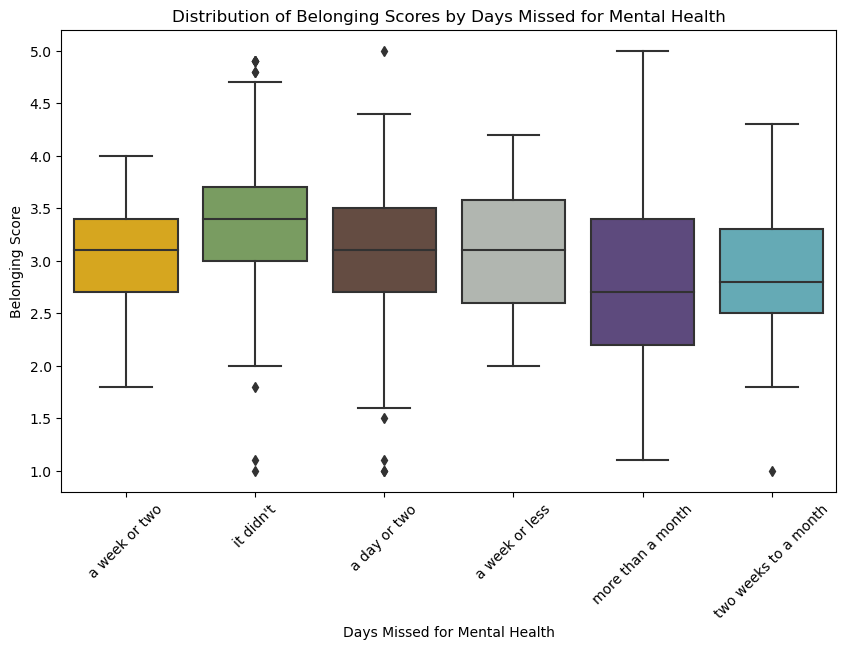

In [34]:

days_missed_col = "How often in the last 12 months did your mental health keep you from participating in your normal activities and relationships?"  # Column for days missed due to mental health
belonging_score_col = "Belonging Barometer Number" 
custom_palette = ["#F4B400", "#77A657", "#6A4A3C", "#B0B7AF", "#5B4186", "#57B4C3"]

plt.figure(figsize=(10, 6))
sns.boxplot(x=data[days_missed_col], y=data[belonging_score_col], palette=custom_palette)
plt.title("Distribution of Belonging Scores by Days Missed for Mental Health")
plt.xlabel("Days Missed for Mental Health")
plt.ylabel("Belonging Score")
plt.xticks(rotation=45)
plt.show()


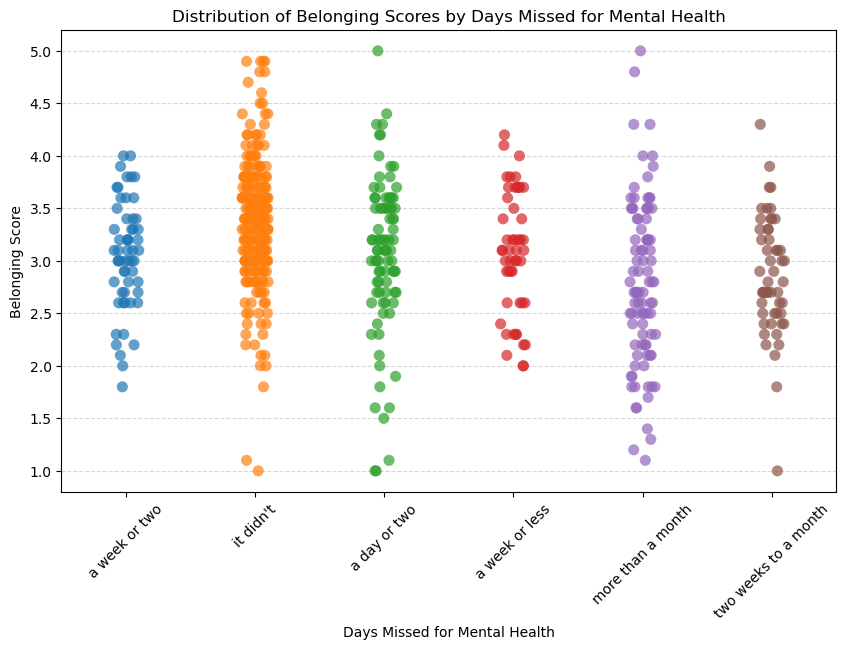

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

days_missed_col = "How often in the last 12 months did your mental health keep you from participating in your normal activities and relationships?"  # Column for days missed due to mental health
belonging_score_col = "Belonging Barometer Number"  
plt.figure(figsize=(10, 6))
sns.stripplot(
    x=data[days_missed_col], 
    y=data[belonging_score_col], 
    jitter=True, 
    dodge=True, 
    alpha=0.7, 
    size=8
)
plt.title("Distribution of Belonging Scores by Days Missed for Mental Health")
plt.xlabel("Days Missed for Mental Health")
plt.ylabel("Belonging Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


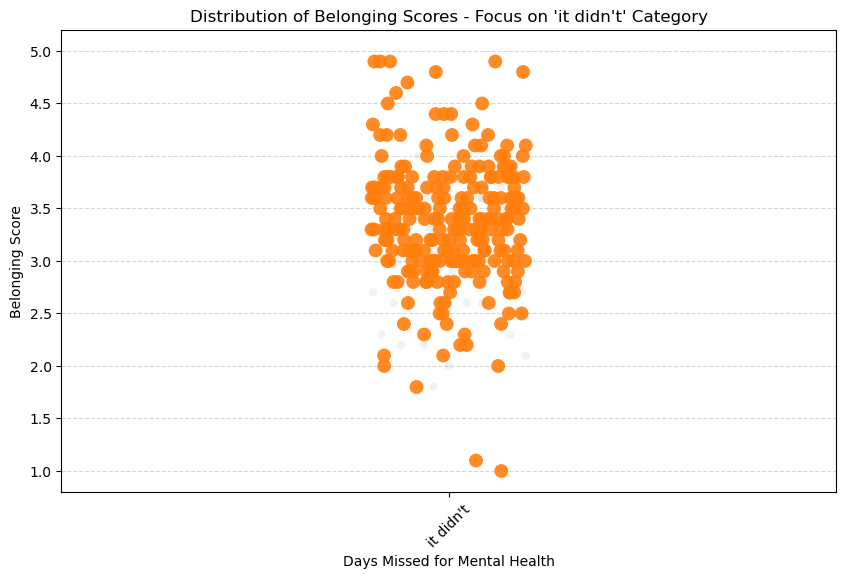

In [36]:

data['highlight'] = data[days_missed_col] == "it didn't"

plt.figure(figsize=(10, 6))

sns.stripplot(
    x=data[days_missed_col][~data['highlight']], 
    y=data[belonging_score_col][~data['highlight']], 
    jitter=True, 
    dodge=True, 
    alpha=0.1,  # High transparency for non-highlighted points
    color="gray",  # Gray color for de-emphasis
    size=6
)

sns.stripplot(
    x=data[days_missed_col][data['highlight']], 
    y=data[belonging_score_col][data['highlight']], 
    jitter=True, 
    dodge=True, 
    alpha=0.9,  # Low transparency for highlighted points
    color="#FF7F0E",  # Brighter color to emphasize
    size=10  # Increased size for emphasis
)

plt.title("Distribution of Belonging Scores - Focus on 'it didn't' Category")
plt.xlabel("Days Missed for Mental Health")
plt.ylabel("Belonging Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


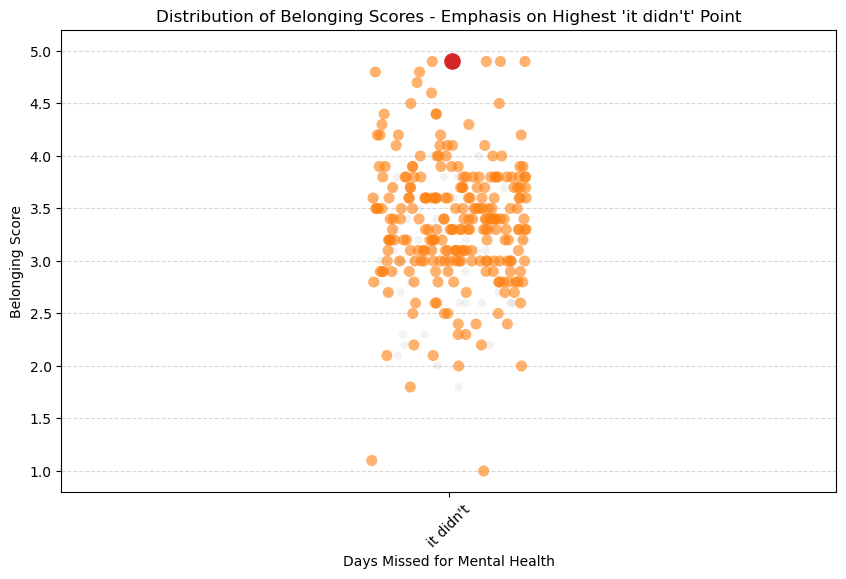

In [37]:

highlighted_point = data[(data['highlight'])].nlargest(1, belonging_score_col)

plt.figure(figsize=(10, 6))

# Plot non-highlighted points (all categories except "it didn't") with high transparency
sns.stripplot(
    x=data[days_missed_col][~data['highlight']], 
    y=data[belonging_score_col][~data['highlight']], 
    jitter=True, 
    dodge=True, 
    alpha=0.1,  # High transparency for non-highlighted points
    color="gray",  # Gray color for de-emphasis
    size=6
)

sns.stripplot(
    x=data[days_missed_col][data['highlight']], 
    y=data[belonging_score_col][data['highlight']], 
    jitter=True, 
    dodge=True, 
    alpha=0.6,  # Reduced transparency for emphasized points
    color="#FF7F0E",  # Brighter color to emphasize
    size=8  # Standard size for the "it didn't" category points
)

# Highlight the specific point with the highest belonging score in the "it didn't" category
sns.stripplot(
    x=highlighted_point[days_missed_col], 
    y=highlighted_point[belonging_score_col], 
    jitter=True, 
    dodge=True, 
    alpha=1.0,  # Full opacity for the highlighted point
    color="#D62728",  # Distinct color (e.g., deep red) to make it stand out
    size=12  # Larger size for this specific point
)

plt.title("Distribution of Belonging Scores - Emphasis on Highest 'it didn't' Point")
plt.xlabel("Days Missed for Mental Health")
plt.ylabel("Belonging Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
file_path = 'exported_data.xlsx'
elements_df = pd.read_excel(file_path, header=1)

# Convert 'Last Date' to datetime format
elements_df['Last Date'] = pd.to_datetime(elements_df['Last Date'], errors='coerce')

# Filter for entries from the year 2024
elements_2024_df = elements_df[elements_df['Last Date'].dt.year == 2024]

# Function to categorize time spent online
def categorize_online_time(time_spent):
    if pd.isnull(time_spent):
        return 'No response'
    elif 'less than an hour' in time_spent:
        return 'Less than 1 hour'
    elif '1 - 3 hours' in time_spent:
        return '1 - 3 hours'
    elif '4 - 6 hours' in time_spent:
        return '4 - 6 hours'
    elif '7 - 9 hours' in time_spent:
        return '7 - 9 hours'
    elif 'more than 9 hours' in time_spent:
        return 'More than 9 hours'
    else:
        return 'Other'  # Catch-all for unexpected values

# Apply the categorization function to the column
elements_2024_df['Online Time Category'] = elements_2024_df['How much time do you spend online?'].apply(categorize_online_time)

# Convert sense of belonging score to numeric
elements_2024_df['Belonging Barometer Number'] = pd.to_numeric(elements_2024_df['Belonging Barometer Number'], errors='coerce')

# Filter for students spending more than 9 hours online
more_than_9_hours_df = elements_2024_df[elements_2024_df['Online Time Category'] == 'More than 9 hours']

# 1. Descriptive Statistics
print("Descriptive statistics for students spending more than 9 hours online:")
print(more_than_9_hours_df['Belonging Barometer Number'].describe())

# 2. Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(more_than_9_hours_df['Belonging Barometer Number'], bins=10, kde=True)
plt.title('Distribution of Sense of Belonging Scores (More than 9 hours)')
plt.xlabel('Sense of Belonging Score')
plt.ylabel('Frequency')
plt.axvline(more_than_9_hours_df['Belonging Barometer Number'].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
plt.axvline(more_than_9_hours_df['Belonging Barometer Number'].median(), color='blue', linestyle='dashed', linewidth=1, label='Median')
plt.legend()
plt.show()

# 3. Comparison with Other Groups
# Calculate the average sense of belonging score for each online time category
average_belonging = elements_2024_df.groupby('Online Time Category')['Belonging Barometer Number'].mean().reset_index()

# Define the order of the categories for plotting
category_order = [
    'Less than 1 hour',
    '1 - 3 hours',
    '4 - 6 hours',
    '7 - 9 hours',
    'More than 9 hours',
    'No response'
]

# Plotting the average sense of belonging by online time category
plt.figure(figsize=(12, 6))
sns.barplot(x='Online Time Category', y='Belonging Barometer Number', data=average_belonging, palette='viridis', order=category_order)
plt.title('Average Sense of Belonging by Time Spent Online (0 to 5 scale)')
plt.xlabel('Online Time Category')
plt.ylabel('Average Belonging Barometer Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 4. Z-Score Normalization
from scipy.stats import zscore

# Apply z-score normalization to the sense of belonging scores for the overall dataset
elements_2024_df['Z-Score'] = zscore(elements_2024_df['Belonging Barometer Number'])

# Plotting the z-scores for each online time category
plt.figure(figsize=(12, 6))
sns.barplot(x='Online Time Category', y='Z-Score', data=elements_2024_df, palette='viridis', order=category_order)
plt.title('Z-Score Normalized Average Sense of Belonging by Time Spent Online')
plt.xlabel('Online Time Category')
plt.ylabel('Z-Score of Average Belonging Barometer Number')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Last Date'